<div class="alert alert-success">
<b> Комментарий от ревьюера 3</b>

Спасибо, что учел мои комментарии. Ты приложил много усилий, чтобы довести проект до конца, надеюсь, что эта работа помогла тебе лучше понять теорию. Я принимаю проект и желаю удачи в прохождении курса!

</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

# **Цель исследования**

1. Приоритизация гипотез для запуска A/B-теста
- Применение фреймворков **ICE** и **RICE** и определение лучшей гипотезы
2. Запуск A/B-теста
- Построение графика кумулятивной выручки по группам;
- Построение графика кумулятивного среднего чека по группам;
- Построение графика относительного изменения кумулятивного среднего чека группы B к группе A;
- Построение графика кумулятивного среднего количества заказов на посетителя по группам;
- Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
- Построение точечного графика количества заказов по пользователям;
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя;
- Построение точечного графика стоимостей заказов;
- Посчитать 95-й и 99-й перцентили стоимости заказов;
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
- Принятие решения по результатам теста;

# **Описание данных**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Файл** /datasets/hypothesis.csv.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Файл** /datasets/orders.csv.

Информация о заказах пользователей в интернет-магазине 

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.

**Файл** /datasets/visitors.csv

Информация о посещениях пользователями интернет-магазина

`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


<div class="alert alert-block alert-success">
    
<b>Комментарий от ревьюера</b> 
    
Хорошо, что во вступительной части ты указываешь всю важную информацию о проекте.
</div>

In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

<div class="alert alert-block alert-success">
    
<b>Комментарий от ревьюера</b> 
    
Все нужные библиотеки загружены, отлично.
</div>

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

**`hypothesis`**

Начнем проверку и подготовку данных

In [3]:
hypothesis.info()
display(hypothesis.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
7,Добавить форму подписки на все основные страни...,10,7,8,5
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
# изменим максимальную ширину на 100
pd.options.display.max_colwidth = 100

In [5]:
# проверим на наличие дубликатов и пропусков
hypothesis.duplicated().sum()

0

In [6]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [7]:
# приведем названия столбков к нижнему регистру
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

**`orders`**

In [8]:
orders.info()
display(orders.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
612,2252458552,2036584322,2019-08-04,1870,B
1133,2645975327,1285103033,2019-08-13,5440,B
983,1428722141,2261102418,2019-08-10,1950,B
205,1993640374,835561402,2019-08-02,500,B
331,2029413212,182753106,2019-08-28,300,A


In [9]:
# приведем date к формату даты
orders['date'] = pd.to_datetime(orders['date'])

# переименуем название столбцов в таблице orders в надлежащий вид
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Да, здесь нужно поменять формат даты.
</div>

In [10]:
orders.duplicated().sum()

0

In [11]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [12]:
orders.describe()

,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [13]:
# проверим, не попадают ли юзеры в обе группы
a_groupid = orders.query('group == "A"')['visitor_id']
b_groupid = orders.query('group == "B"')['visitor_id']
len(set(a_groupid) & set(b_groupid))

58

Здесь с данными все в порядке, идем дальше

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Полезно выполнить проверку, не попадают ли какие-то пользователи в обе группы - по таблице с заказами.

</div>

<div style="border: 1px solid #bee5eb; background-color: #d1ecf1; color: #0c5460; padding: 10px; border-radius: 5px; margin-top: 10px;">
Мы нашли 58 пользователей попавших в обе группы. Однако, по опыту моих одногруппников, мы не удаляем их, а предупреждаем коллег об этом
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера 2</b>
    
В данном случае таблица с визитами содержит уже агрегированные данные, эффективно очистить обе таблицы не получится, поэтому пользователей можно оставить в тесте.
</div>

**`visitors`**

In [14]:
visitors.info()
display(visitors.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
25,2019-08-26,A,722
61,2019-08-31,B,718
17,2019-08-18,A,668
32,2019-08-02,B,581
42,2019-08-12,B,543


In [15]:
visitors.duplicated().sum()

0

In [16]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [17]:
# также приводим к формату даты
visitors['date'] = pd.to_datetime(visitors['date'])

# Приоритизация гипотез

**ICE**

In [18]:
# посчитаем ice и добавим его к нашей таблице, округлив до 3 знаков после запятой
# отсортируем данные и выведем
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 3)
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


<div class="alert alert-success">
<b> Комментарий от ревьюера</b>

Молодец, что скорректировал ширину столбцов, так намного удобнее сравнивать гипотезы. 

</div>

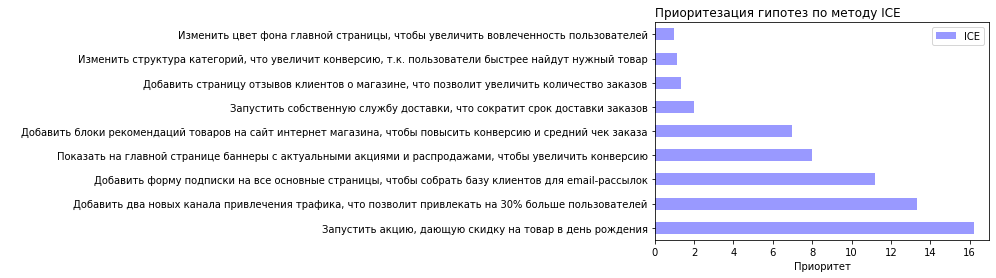

In [19]:
(hypothesis[['hypothesis', 'ICE']]
    .set_index('hypothesis')
    .sort_values('ICE', ascending=False)
    .plot(kind='barh', color='blue', alpha=0.4, grid=False))

plt.xlabel('Приоритет')
plt.ylabel(' ')
plt.title('Приоритезация гипотез по методу ICE', loc='left')
plt.show()

Из полученных данных мы можем понять, что наиболее перспективные гипотезы под номером - 8, 0 и 7. Далее идут гипотезы 6 и 2

**RICE**

In [20]:
# также, посчитаем rice и добавим к нашей таблице
# отсортируем данные и выведем
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'])
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


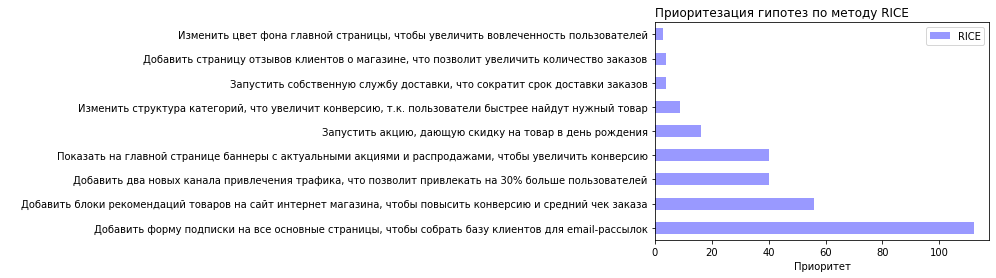

In [21]:
(hypothesis[['hypothesis', 'RICE']]
    .set_index('hypothesis')
    .sort_values('RICE', ascending=False)
    .plot(kind='barh', color='blue', alpha=0.4, grid=False))

plt.xlabel('Приоритет')
plt.ylabel(' ')
plt.title('Приоритезация гипотез по методу RICE', loc='left')
plt.show()

Исходя из данного фреймворка, мы видим, что наиболее перспективные 7, 2, 0 и 6

In [22]:
hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000,3.0


**Вывод**


Гипотеза №8 имеет самый высокий приоритет по ICE (16.2) и, вероятно, принесет наибольшую пользу при реализации. Гипотеза №7  лидирует по RICE (112.0), что говорит о её значительном охвате и важности.

Интересно, что гипотезы, такие как №0, имеют высокий ICE (13.333), но относительно низкий RICE (40.0), что может указывать на ограниченный охват пользователей, несмотря на высокую ожидаемую эффективность.

Наиболее перспективные для реализации — гипотезы №8 и №7, так как они сочетают в себе высокую эффективность и значимость. Напротив, гипотезы №4 и №5 с низкими ICE и RICE могут быть отложены, так как их реализация принесет наименьшую пользу.

<div class="alert alert-block alert-warning">
    

**Комментарий от ревьюера**

Стоит привести названия гипотез полностью, на случай если у заказчика они будут прописаны в другом порядке. Также здесь можно выбрать гипотезу, которую мы будем тестировать первой, чтобы между частями проекта была логическая связь.

</div>

<div style="border: 1px solid #bee5eb; background-color: #d1ecf1; color: #0c5460; padding: 10px; border-radius: 5px; margin-top: 10px;">
    Буду иметь ввиду 👍 
</div>

# Анализ A/B-теста

**Кумулятивные метрики**

In [23]:
# Создадим массив уникальных пар значений дат и групп теста 
dates_groups = orders[['date','group']].drop_duplicates()

In [24]:
# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [25]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [26]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<div class="alert alert-block alert-warning">

**Комментарий от ревьюера**

Здесь можно проверить, корректно ли был создан датафрейм cumulative_data. Например, совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных.

</div>

**Выручка по группам**

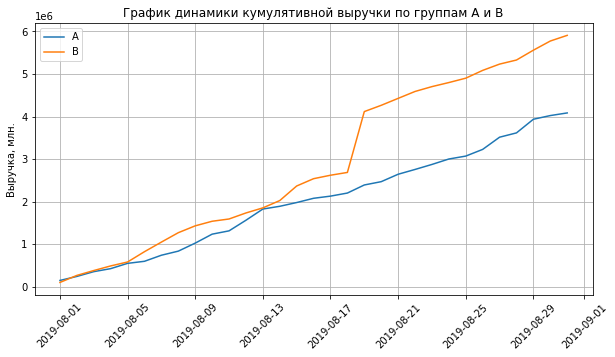

In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки групп
plt.figure(figsize=(10, 5))
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B')
plt.title('График динамики кумулятивной выручки по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Кумулятивная выручка группы А демонстрирует устойчивый линейный рост, однако она остается ниже, чем у группы В. В группе В наблюдается резкий скачок около 18 августа, что может указывать на резкое увеличение числа заказов или на появление очень крупных заказов в выборке.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, пока мы не знаем, с чем связан скачок в группе B: с резким увеличением количества заказов или с ростом стоимости.
</div>

**Средний чек по группам**

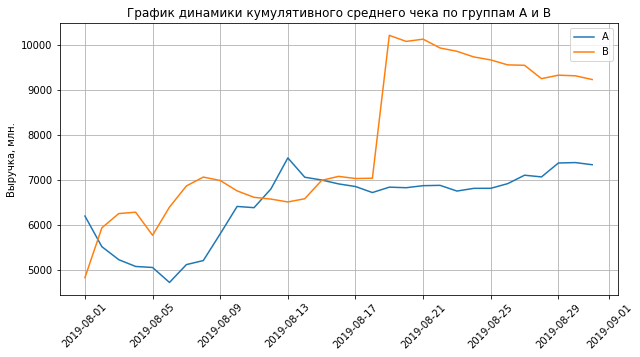

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['orders'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['orders'], label='B')
plt.title('График динамики кумулятивного среднего чека по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Мы видим, что средний чек группы 'А' сначала опустился, но со временем стабилизировался. В группе 'B' все было стабильно до упомянутого выше 18-го августа. Это также, говорит о большой покупке.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Да, резкий рост происходит в ту же дату, что и на предыдущем графике.
</div>

In [29]:
# создадим объединеную таблицу кумулятивных данных групп с сохранением столбцов revenue и orders обеих групп
merged_cumulative_revenue = (cumulative_revenueA
                                 .merge(cumulative_revenueB,
                                        left_on='date',
                                        right_on='date',
                                        how='left',
                                        suffixes=['_a', '_b'])
                            )
merged_cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


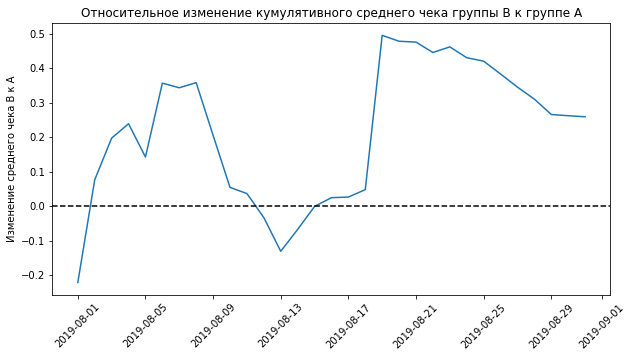

In [30]:
# cтроим график отношения кумулятивного среднего чека группы B к группе А
plt.figure(figsize=(10,5))
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenue_b'] / merged_cumulative_revenue['orders_b']) / 
         (merged_cumulative_revenue['revenue_a'] / merged_cumulative_revenue['orders_a'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('Изменение среднего чека B к A')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-danger">
    

**Комментарий от ревьюера**

Добавь, пожалуйста, подпись оси Y для этого графика. Подписи осей дают контекст и объясняют, что представляют из себя данные, что важно для правильной интерпретации графика.
</div>

<div style="border: 1px solid #bee5eb; background-color: #d1ecf1; color: #0c5460; padding: 10px; border-radius: 5px; margin-top: 10px;">
    👍 
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера 2</b> 
    
Отлично, так график проще понять.
</div>

График показывает резкие скачки в нескольких точках, что явно указывает на наличие выбросов или крупных заказов.

**Среднее количество заказов на посетителя**

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
В проекте для этого показателя здесь и дальше используется формулировка "среднее количество заказов на посетителя". Она более корректная, так как для расчета конверсии в чистом виде, нам нужны id посетителей. Поправь, пожалуйста, формулировки, чтобы они совпадали с заданием. Это можно сделать с помощью автозамены: в меню Edit ➡ Find and Replace. 
    
Кнопка со скриншота ниже позволяет сделать замены сразу во всех ячейках:
    
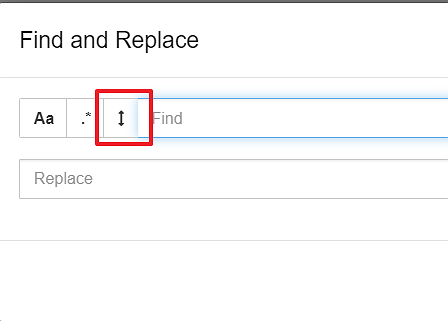
    
</div>

<div style="border: 1px solid #bee5eb; background-color: #d1ecf1; color: #0c5460; padding: 10px; border-radius: 5px; margin-top: 10px;">
    Готово 
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера 2**
    
Здесь также надо поправить другие формулировки, кроме названия:
    
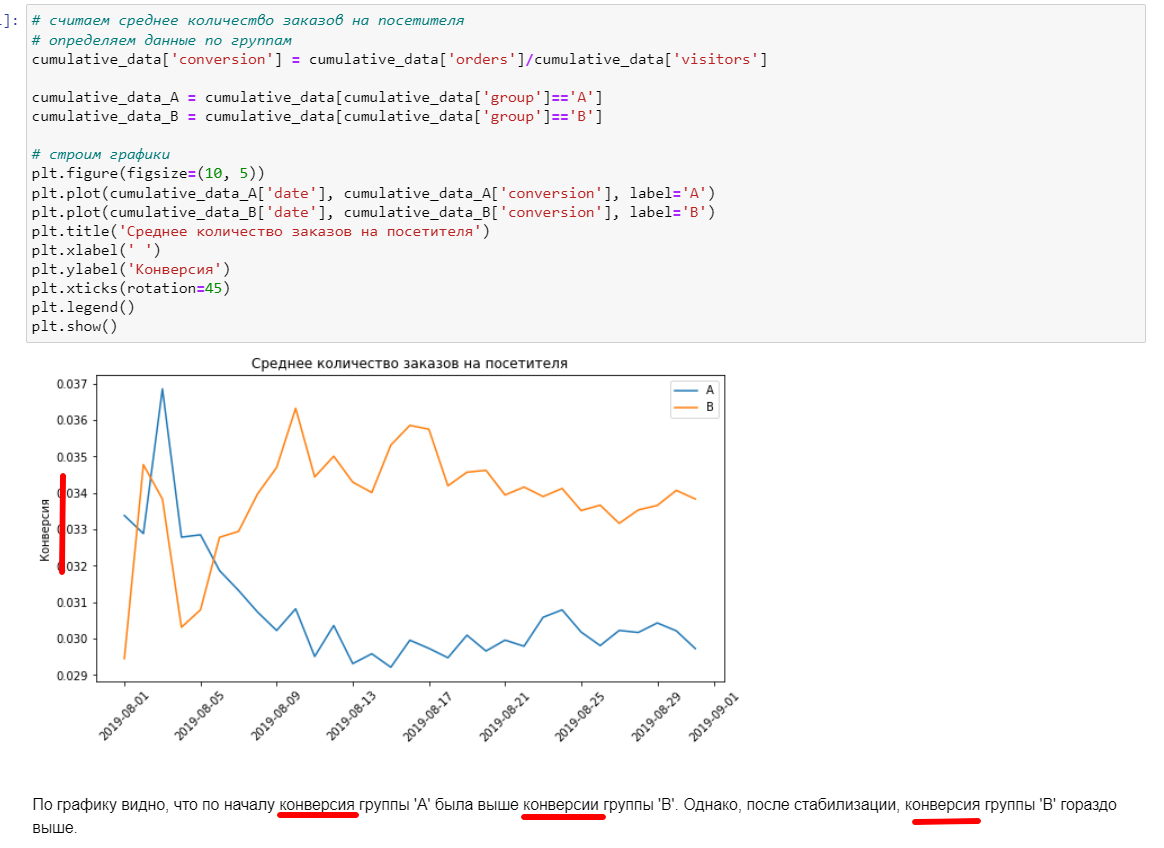
    
</div>

<div class="alert alert-info">
  <b>Комментарий студента №2</b>
  <br>
  Исправил везде. Немного не обратил внимания 🥲
</div>

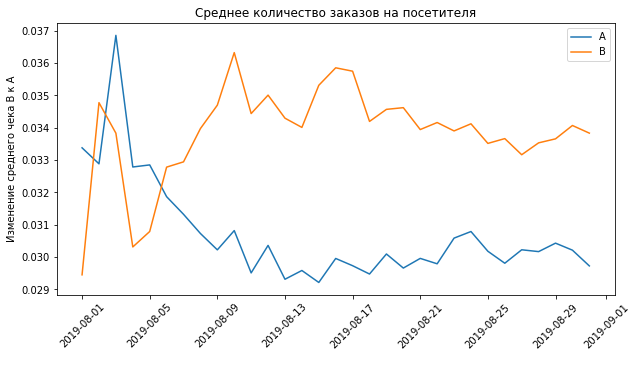

In [31]:
# считаем среднее количество заказов на посетителя
# определяем данные по группам
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(10, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.title('Среднее количество заказов на посетителя')
plt.xlabel(' ')
plt.ylabel('Изменение среднего чека B к A')
plt.xticks(rotation=45)
plt.legend()
plt.show()

По графику видно, что по началу среднее количество заказов группы 'A' была выше среднего количество заказов группы 'B'. Однако, после стабилизации, средняя группы 'B' гораздо выше.

**Относительное изменение кумулятивного среднего количества заказов группы B к группе А**

In [32]:
# создадим объединенную таблицу кумулятивной сред.количества заказов с сохранение столбцов conversion 
merged_cumulative_conversions = (cumulative_data_A[['date','conversion']]
                                     .merge(cumulative_data_B[['date','conversion']],
                                            left_on='date', right_on='date',
                                            how='left',
                                            suffixes=['_a', '_b'])
)
merged_cumulative_conversions.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


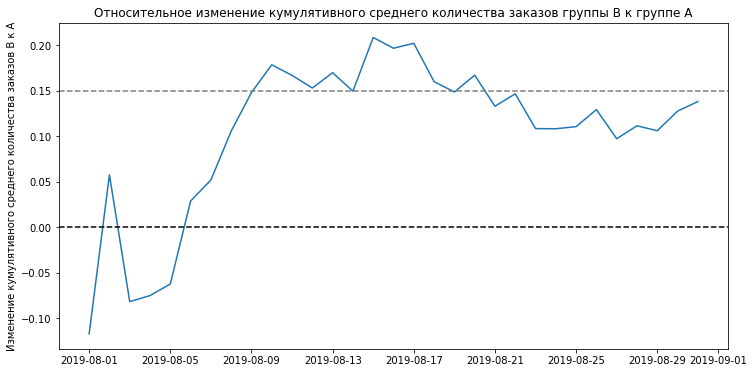

In [33]:
plt.figure(figsize=(12,6))
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversion_b'] / merged_cumulative_conversions['conversion_a']-1)
plt.title('Относительное изменение кумулятивного среднего количества заказов группы B к группе A')
plt.ylabel('Изменение кумулятивного среднего количества заказов B к A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Здесь тоже стоит добавить подпись оси Y.
    
</div>

<div style="border: 1px solid #bee5eb; background-color: #d1ecf1; color: #0c5460; padding: 10px; border-radius: 5px; margin-top: 10px;">
    👍 
</div>

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера 2**
    
Здесь тоже надо поправить название пункта, чтобы оно совпадало с заданием, и формулировки внутри пункта.
    
</div>

<div class="alert alert-info">
  <b>Комментарий студента №2</b>
  <br>
  Исправлено
</div>

В начале теста группа B отставала от группы A, но затем вырвалась вперед. Ее кумулятивная среднего количества заказов быстро росла, а затем начался медленный спад. Сейчас кумулятивная средняя количества заказов группы B снова идет вверх. Однако, не стоит забывать, что предыдущие графики указывали на наличие крупных заказов. Необходимо повторно проанализировать данные после удаления выбросов.

**Анализ выбросов и всплесков**

**Точечный график количества заказов пользователей**

In [34]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns =  ['visitor_id', 'orders']
display(orders_by_users['orders'].describe())

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

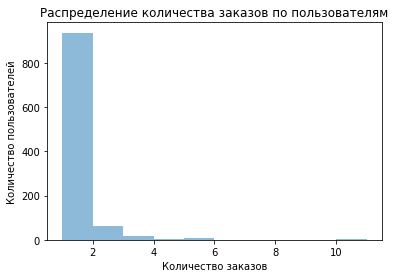

In [35]:
# строим гистограмму
plt.hist(orders_by_users['orders'], alpha=0.5) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

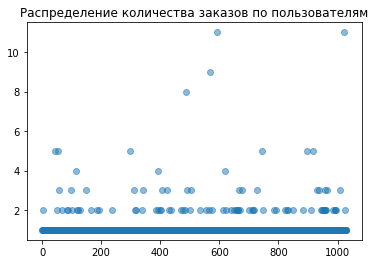

In [36]:
x_values = pd.Series(range(0,len(orders_by_users)))
# строим точечную диаграмму

plt.scatter(x_values, orders_by_users['orders'], alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.show()

Большинство пользователей оформляют заказы только один раз, но есть группа, которая совершает по 2 заказа, и небольшое число пользователей, делающих от 3 до 11 заказов в месяц.

Посчитаем пользователей с аномальным количеством заказов

In [37]:
print(np.percentile(orders_by_users['orders'], [90, 95, 99]))

[1. 2. 4.]


е более 5% пользователей совершили более двух покупок за время тестирования, и только 1% - четыре или больше. Будем считать 4 заказа на одного пользователя верхним пределом.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Такое определение выбросов для количества заказов корректно.
</div>

**Стоимость заказов пользователей**

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

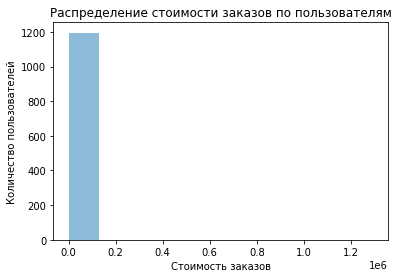

In [38]:
display(orders['revenue'].describe())

# строим гистограмму
plt.hist(orders['revenue'], alpha=0.5) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.show()

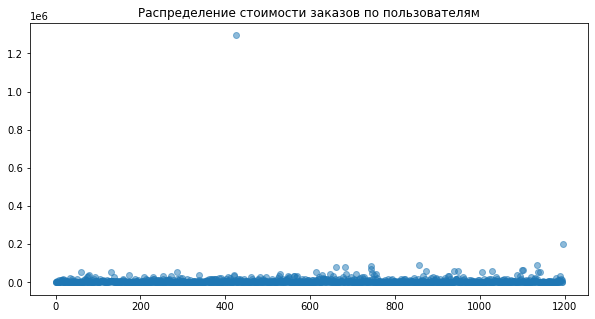

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# строим точечную диаграмму
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Один из заказов был оформлен на сумму более 1.3 миллионов. Это определенно повлияет на результат исследования. Построим аналогичную диаграмму и отсеем большие заказы

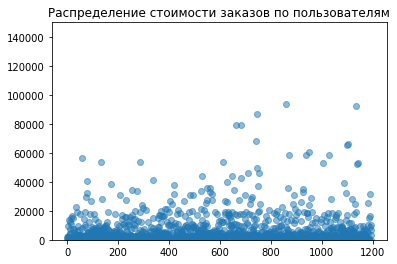

In [40]:
# строим точечную диаграмму
plt.ylim(0, 150000)
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Хорошо, что ты добавляешь еще один график, чтобы мы могли рассмотреть основную часть заказов.

</div>

Основная масса заказов не превышает 20.000

In [41]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Лишь 1% заказов больше 58233. Именно эту сумму мы возьмем как границу по величине заказов

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Такое определение выбросов для стоимости заказов корректно.
</div>

# **Анализ статистической значимости**

**Подготовка "сырых" данных**

Ранее мы оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы.
Также, увидели эти самые выбросы и нашли границу для их определения.

Далее, Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. 
- **Нулевая:** различий в среднем количестве заказов между группами нет. 
- **Альтернативная:** различия в среднем количестве заказов между группами есть.

**Стат. значимость = 0.05**

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера 2**
    
Здесь тоже надо поправить формулировки.
    
</div>

<div class="alert alert-info">
  <b>Комментарий студента №2</b>
  <br>
  Исправлено
</div>

In [42]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head()

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Напомним названия столбцов данных:
- `date` — дата;
- `orders_daily_a` — количество заказов в выбранную дату в группе A;
- `revenue_daily_a` — суммарная выручка в выбранную дату в группе A;
- `orders_daily_b` — количество заказов в выбранную дату в группе B;
- `revenue_per_date_b` — суммарная выручка в выбранную дату в группе B;
- `orders_cummulative_a` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenue_cummulative_a` — суммарная выручка до выбранной даты включительно в группе A;
- `orders_cummulative_b` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenue_cummulative_b` — суммарная выручка до выбранной даты включительно в группе B;
- `visitors_per_date_a` — количество пользователей в выбранную дату в группе A;
- `visitors_per_date_b` — количество пользователей в выбранную дату в группе B;
- `visitors_cummulative_a` — количество пользователей до выбранной даты включительно в группе A;
- `visitors_cummulative_b` — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные `orders_by_users_a` и `orders_by_users_b` со столбцами `['visitors_id', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [43]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни

In [44]:
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_a'].sum() - 
                                          len(orders_by_users_a['orders'])), 
                          name='orders')],axis=0
                    )

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_b'].sum() - 
                                          len(orders_by_users_b['orders'])), 
                          name='orders')],axis=0
                    )

In [45]:
# посчитаем критерий Манна-Уитни к среднему количеству заказов
# и относительный прирост среднего количества заказов группы B

print('Значение p-value для среднего количества заказов: {:.3f}'.format(st.mannwhitneyu(sample_a, sample_b)[1]))

if st.mannwhitneyu(sample_a, sample_b)[1] < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Относительный прирост среднего количества заказов группы B: {:.2%}'.format((sample_b.mean()/sample_a.mean()) - 1))

Значение p-value для среднего количества заказов: 0.017
Отвергаем нулевую гипотезу
Относительный прирост среднего количества заказов группы B: 13.81%


**Вывод**

На основе рассчитанного значения p-value (0.017), мы отвергаем нулевую гипотезу, что указывает на статистически значимые различия в среднем количестве заказов между группами. Средняя в группе B показала относительный прирост на 13.81% по сравнению с группой A, что свидетельствует о положительном эффекте проведенных изменений.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, отвергаем нулевую гипотезу: между группами есть статистически значимое различие.
</div>

**Cтатистическая значимость различий в среднем чеке заказа. "Сырые" данные**

Теперь проверим статистическую значимость различий в среднем чеке между группами по "сырым" данным, без удаления аномальных пользователей. 

Сформулируем гипотезы.

- **Нулевая гипотеза:** различий в среднем чеке между группами нет. 
- **Альтернативная гипотеза:** различия в среднем чеке между группами есть. 


**Стат. значимость = 0.05**

In [46]:
# посчитаем критерий Манна-Уитни к среднему чеку
# и относительный прирост среднего чека группы B

pvalue_mean_check = st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]

print('Значение p-value для среднего чека: {:.3f}'.format(pvalue_mean_check))

if pvalue_mean_check < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего чека группы B к А: {:.2%}'
        .format((orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean()) - 1))

Значение p-value для среднего чека: 0.729
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B к А: 25.87%


**Вывод**

Значение p-value для среднего чека составило 0.729, что значительно выше порога значимости 0.05. Это означает, что у нас нет оснований отвергнуть нулевую гипотезу, и статистически значимых различий в среднем чеке между группами A и B не наблюдается. Тем не менее, относительный прирост среднего чека в группе B по сравнению с группой A составил 25.87%, что указывает на определенное увеличение среднего чека, хоть и без статистической значимости.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Да, по этому показателю между группами нет статистически значимых различий.
</div>

**Статистическая значимость различий в конверсии между группами. "Очищенные" данные**


Считаем аномальными пользователей, которые совершили 5 и более заказов или сделали заказы на сумму более 58,233. Это позволит исключить 1% пользователей с наибольшим количеством заказов и 1% пользователей с самыми дорогими заказами. Создадим выборки: пользователей с более чем 4 заказами — users_with_many_orders и пользователей, совершивших заказы на сумму более 58,233 — users_with_expensive_orders. Объединим их в таблицу abnormal_users и с помощью метода shape() узнаем, сколько всего аномальных пользователей.

In [47]:
many_orders = np.percentile(orders_by_users['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)


users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head())
print('Количество аномальных пользователей:', abnormal_users.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

Количество аномальных пользователей: 15


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Здорово, что ты не вводишь числа вручную, а используешь автоматический расчет. Так не придется менять код, если данные поменяются.
    
</div>

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

**Cтатистическая значимость различий в среднем количестве заказов. "Очищенные" данные**

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера 2**
    
Здесь тоже надо поправить название пункта и формулировки.
    
</div>

<div class="alert alert-info">
  <b>Комментарий студента №2</b>
  <br>
  Исправлено
</div>

Проверим, есть ли статическая значимость различий в среднем количестве заказов c помощью критерия Манна-Уитни и узнаем какой относительный прирост среднего группы B по очищенным данным.


Сформулируем гипотезы.

- **Нулевая:** стат. значимых различий в среднем количестве заказов между группами нет.
- **Альтернативная:** стат. значимые различия в среднем количестве заказов между группами есть.

**Стат.значимость = 0.05**

In [48]:
# подготовим данные
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Здесь и в следующем вопросе нужно заново сформулировать гипотезы, чтобы для каждого расчета было полное описание. Желательно также повторить значение alpha. 
    
</div>

<div class="alert alert-block alert-info">
✅
<b></b>


</div>

In [49]:
# посчитаем критерий Манна-Уитни ко среднему количеству заказов для "очищенных" данных
# и относительный прирост среднего группы B
print('Значение p-value для среднего количества заказов: {:.3f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

if st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего количества заказов группы B к А: {:.2%}'.format((sample_b_filtered.mean() / sample_a_filtered.mean()) - 1))


Значение p-value для среднего количества заказов: 0.014
Отвергаем нулевую гипотезу
Относительный прирост среднего количества заказов группы B к А: 15.33%


**Вывод**

Значение p-value для конверсий составило 0.014, что ниже порога значимости 0.05. Это позволяет нам отвергнуть нулевую гипотезу и заключить, что существуют статистически значимые различия в среднем количестве заказов между группами. Средняя в группе B выросла на 15.33% по сравнению с группой A, что указывает на существенное улучшение показателя в группе B.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, при анализе "очищенных данных" p-value стало еще меньше и все так же меньше 0.05, следовательно, между группами есть статистически значимые различия.
</div>

**Статистическая значимость различий в среднем чеке заказа между группами. "Oчищенные" данные**

Посчитаем относительный прирост среднего чека в группе В по очищенным данным.

Сформулируем гипотезы.

- **Нулевая:** стат. значимых различий в среднем чеке между группами нет.
- **Альтернативная:** стат. значимые различия в среднем чеке между группами есть.

**Стат.значимость = 0.05**

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера 2**
    
Здесь надо добавить абзац с гипотезами, как это сделано в предыдущем пункте.
    
</div>

<div class="alert alert-info">
  <b>Комментарий студента №2</b>
  <br>
  Исправлено
</div>

In [50]:
# посчитаем критерий Манна-Уитни к среднему чеку для очищенных данных 
# и относительный прирост среднего чека группы В

filtered_pvalue_mean_check = st.mannwhitneyu(
    orders[np.logical_and(orders['group'] == "A", np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(orders['group'] == "B", np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]

print('Значение p-value для среднего чека: {:.3f}'.format(filtered_pvalue_mean_check))


if filtered_pvalue_mean_check < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

    
print('Относительный прирост среднего чека группы B к А: {:.2%}'.format(
    (orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/
     orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']
     .mean()) - 1))

Значение p-value для среднего чека: 0.851
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B к А: -0.57%


Значение p-value для среднего чека составило 0.851, что значительно выше порога значимости 0.05. Это означает, что у нас нет оснований отвергнуть нулевую гипотезу, и статистически значимых различий в среднем чеке между группами не выявлено. Более того, средний чек в группе B оказался на 0.57% ниже, чем в группе A.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Да, здесь видно, как на относительные различия повлияли выбросы.
</div>

# Вывод

На основе предоставленных интернет-магазином данных было проведено исследование, результаты которого приводятся ниже.

**Приоритизация гипотез:**

Среди предложенных отделом маркетинга гипотез рекомендуется уделить первоочередное внимание следующим:
- «Запуск акции, предоставляющей скидку на товар в день рождения»,
- «Добавление двух новых каналов привлечения трафика для увеличения количества пользователей на 30%»,
- «Добавление формы подписки на все основные страницы для сбора базы клиентов для email-рассылок».

Если в процессе ранжирования гипотез необходимо учитывать охват пользователей интернет-магазина, то приоритеты 
следует расставить следующим образом:

- «Добавление формы подписки на все основные страницы для сбора базы клиентов для email-рассылок»,
- «Добавление блоков рекомендаций товаров на сайт интернет-магазина для повышения конверсии и среднего чека»,
- «Добавление двух новых каналов привлечения трафика для увеличения количества пользователей на 30%».

**Анализ результатов A/B теста:**

Обнаружены статистически значимые различия в конверсии между группами как на «сырых» данных, так и после фильтрации аномалий. Конверсия группы B оказалась на 14-15% выше, чем в группе A.

Статистически значимых различий в среднем чеке между группами не выявлено, ни на «сырых», ни на очищенных данных. Однако на «очищенных» данных средний чек в группе B оказался примерно на 2% выше.

График относительных изменений кумулятивной конверсии показывает, что результаты группы B стабильно превосходят группу A.

**На основании этих выводов рекомендуется завершить тестирование, зафиксировав победу группы B, так как её конверсия значительно превышает конверсию группы A.**

<div class="alert alert-block alert-info">

<b>Итоговый комментарий от ревьюера</b>

Благодарю тебя за выполнение проекта. Вижу ты постарался, когда работал над ним. Однако, в проекте есть несколько замечаний, которые надо исправить:

* дополнить оформление графиков;
* скорректировать формулировки;
* дополнить описание статистических расчетов.
       
Жду проект после доработки. Уверена, ты справишься. 💪
</div>